In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load the data
df = pd.read_csv('df_work3.csv', encoding='utf-8')

# Drop the unnamed index column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns='Unnamed: 0')

#df = df.drop(columns='Country')

print(f"Total records: {len(df)}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nData shape: {df.shape}")

# Fill missing values
df['Industry'] = df['Industry'].fillna('Unknown')
df['Job Title'] = df['Job Title'].fillna('Unknown')
df['Years of Experience'] = df['Years of Experience'].fillna('Unknown')
df['Education Level'] = df['Education Level'].fillna('Unknown')
df['Age_range'] = df['Age_range'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')
df['Gender'] = df['Gender'].fillna('Unknown')
df['Lead Source'] = df['Lead Source'].fillna('Unknown')

# Encode categorical variables (all columns except is_sale)
encoded_cols = ['State', 'Industry', 'Job Title', 
                'Education Level', 'Age_range', 'Years of Experience', 
                'Gender', 'Lead Source']

df_encoded = df.copy()
le_dict = {}

for col in encoded_cols:
    le = LabelEncoder()
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col].astype(str))
    le_dict[col] = le

# Prepare features for clustering
feature_cols = [col + '_encoded' for col in encoded_cols]
X = df_encoded[feature_cols].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Total records: 1370

Column names:
['Country', 'State', 'Industry', 'Job Title', 'Education Level', 'Age_range', 'Years of Experience', 'Gender', 'Lead Source', 'is_sale']

Data shape: (1370, 10)


In [3]:
# Perform K-Means clustering for 4 and 5 clusters
results = {}

for n_clusters in [4, 5]:
    print(f"\n{'='*60}")
    print(f"K-MEANS CLUSTERING WITH {n_clusters} CLUSTERS")
    print(f"{'='*60}")
    
    # Fit K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=300)
    df_encoded[f'Cluster_{n_clusters}'] = kmeans.fit_predict(X_scaled)
    
    # Store results
    results[n_clusters] = {
        'model': kmeans,
        'labels': kmeans.labels_,
        'inertia': kmeans.inertia_
    }
    
    print(f"\nInertia (sum of squared distances): {kmeans.inertia_:.2f}")
    print(f"\nCluster sizes:")
    print(df_encoded[f'Cluster_{n_clusters}'].value_counts().sort_index())
    
    # Analyze each cluster
    for cluster_id in range(n_clusters):
        cluster_mask = df_encoded[f'Cluster_{n_clusters}'] == cluster_id
        cluster_data = df[cluster_mask]
        
        print(f"\n{'='*50}")
        print(f"CLUSTER {cluster_id + 1} - Size: {len(cluster_data)}")
        print(f"{'='*50}")
        
        # Top states
        print(f"\nTop 5 States:")
        state_counts = cluster_data['State'].value_counts().head(5)
        for state, count in state_counts.items():
            pct = (count / len(cluster_data)) * 100
            print(f"  {state}: {count} ({pct:.1f}%)")
        
        # Top industries
        print(f"\nTop 5 Industries:")
        industry_counts = cluster_data['Industry'].value_counts().head(5)
        for industry, count in industry_counts.items():
            pct = (count / len(cluster_data)) * 100
            print(f"  {industry}: {count} ({pct:.1f}%)")
        
        # Top job titles
        print(f"\nTop 5 Job Titles:")
        title_counts = cluster_data['Job Title'].value_counts().head(5)
        for title, count in title_counts.items():
            if title != 'Unknown' and str(title).strip():
                pct = (count / len(cluster_data)) * 100
                print(f"  {title}: {count} ({pct:.1f}%)")
        
        # Experience distribution
        print(f"\nYears of Experience Distribution:")
        exp_counts = cluster_data['Years of Experience'].value_counts()
        for exp, count in exp_counts.items():
            pct = (count / len(cluster_data)) * 100
            print(f"  {exp}: {count} ({pct:.1f}%)")
        
        # Conversion rate
        conversions = cluster_data['is_sale'].sum()
        conversion_rate = (conversions / len(cluster_data)) * 100 if len(cluster_data) > 0 else 0
        print(f"\nConversion Rate: {conversion_rate:.2f}% ({conversions} conversions)")

# Visualization: PCA for dimensionality reduction
print("\n" + "="*60)
print("GENERATING VISUALIZATIONS")
print("="*60)


K-MEANS CLUSTERING WITH 4 CLUSTERS

Inertia (sum of squared distances): 4065.77

Cluster sizes:
Cluster_4
0    211
1    307
2    662
3    190
Name: count, dtype: int64

CLUSTER 1 - Size: 211

Top 5 States:
  Unknown: 208 (98.6%)
  REGI�N METROPOLITANA: 2 (0.9%)
  TX: 1 (0.5%)

Top 5 Industries:
  Unknown: 207 (98.1%)
  Construction: 1 (0.5%)
  Otros: 1 (0.5%)
  Agricultura y Miner�a: 1 (0.5%)
  Software e Internet: 1 (0.5%)

Top 5 Job Titles:
  Other: 2 (0.9%)
  Aerospace: 2 (0.9%)
  حص: 1 (0.5%)
  Vp/ sr director: 1 (0.5%)

Years of Experience Distribution:
  10-15 Years: 103 (48.8%)
  15-20 Years: 100 (47.4%)
  0 - 2: 4 (1.9%)
  15-Oct: 3 (1.4%)
  16-25 a�os: 1 (0.5%)

Conversion Rate: 3.79% (8 conversions)

CLUSTER 2 - Size: 307

Top 5 States:
  IL: 69 (22.5%)
  Unknown: 30 (9.8%)
  CA: 17 (5.5%)
  NY: 14 (4.6%)
  TX: 12 (3.9%)

Top 5 Industries:
  Banking / Financial Services: 50 (16.3%)
  Technology: 24 (7.8%)
  Healthcare: 18 (5.9%)
  Other: 18 (5.9%)
  Unknown: 17 (5.5%)

Top 5


Visualization saved as 'kmeans_clusters_visualization.png'
Cluster analysis charts saved as 'kmeans_cluster_analysis.png'

Clustered data saved to 'clustered_output.csv'


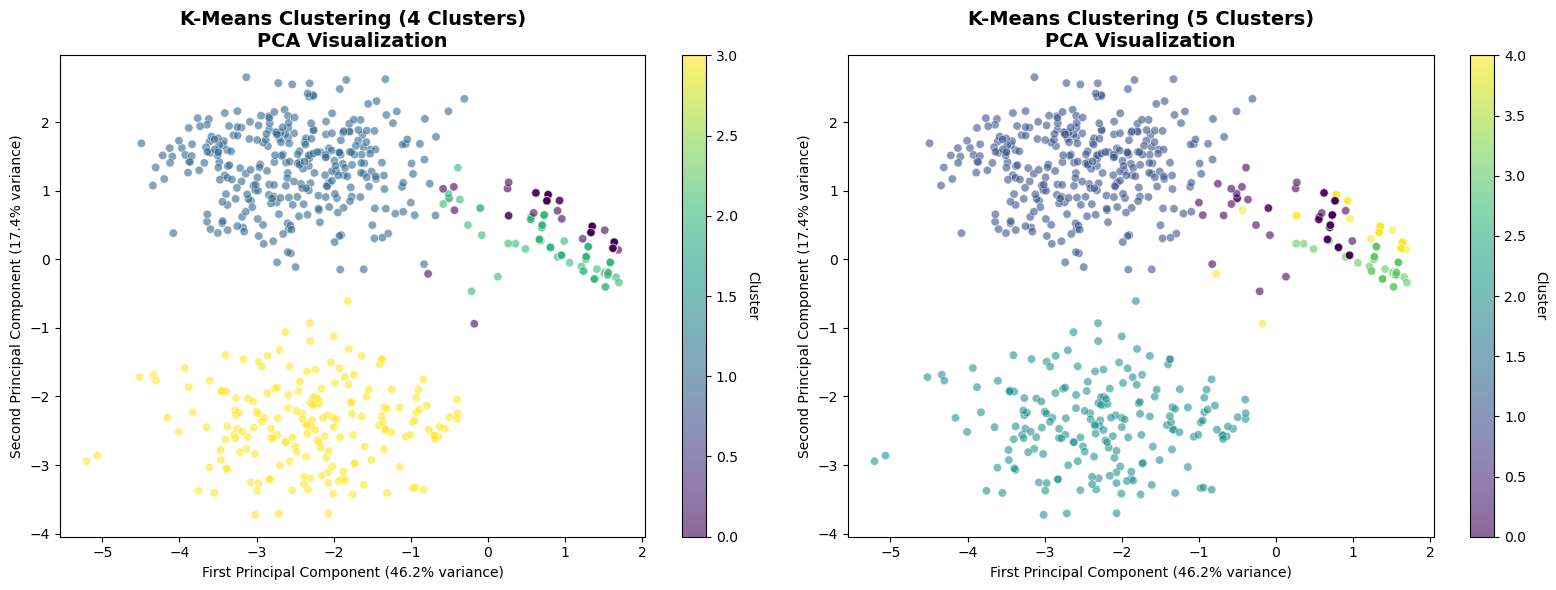

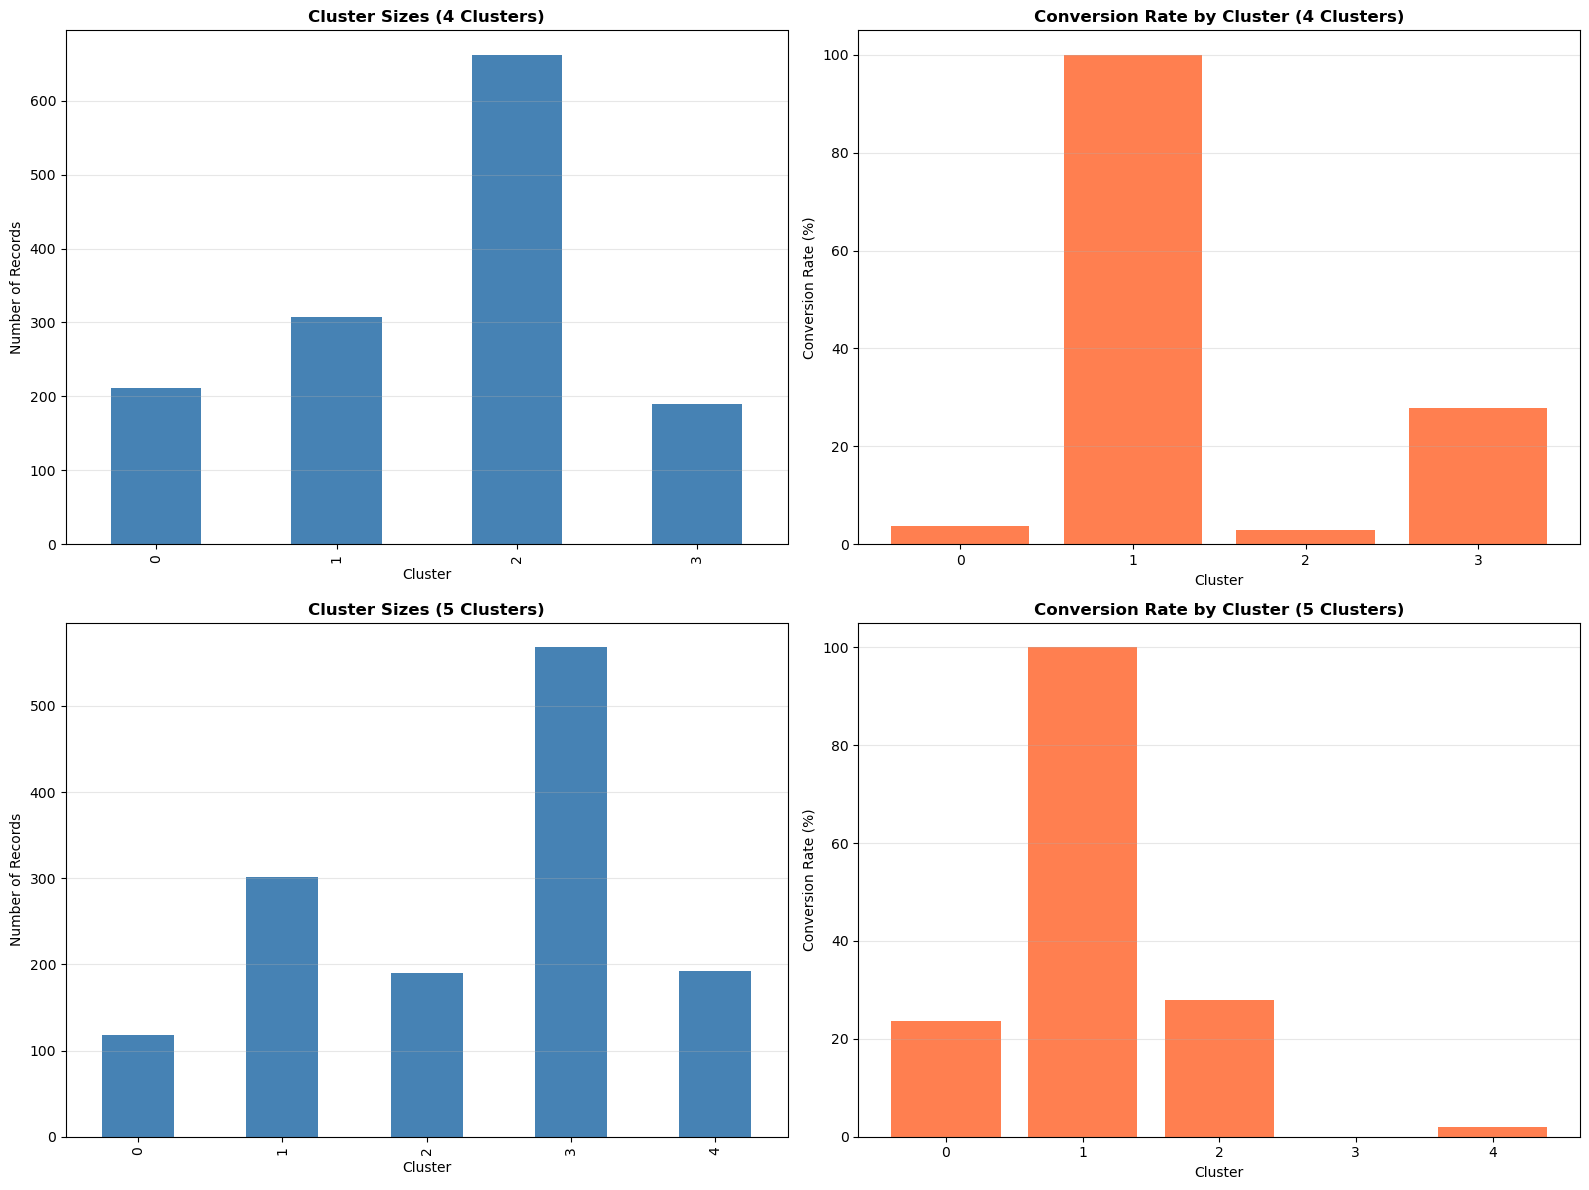

In [4]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create visualizations for both 4 and 5 clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, n_clusters in enumerate([4, 5]):
    ax = axes[idx]
    labels = results[n_clusters]['labels']
    
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                        c=labels, cmap='viridis', 
                        alpha=0.6, edgecolors='w', linewidth=0.5)
    
    ax.set_title(f'K-Means Clustering ({n_clusters} Clusters)\nPCA Visualization', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)')
    ax.set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)')
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Cluster', rotation=270, labelpad=15)

plt.tight_layout()
plt.savefig('kmeans_clusters_visualization.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved as 'kmeans_clusters_visualization.png'")

# Create bar charts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, n_clusters in enumerate([4, 5]):
    cluster_col = f'Cluster_{n_clusters}'
    
    # Cluster sizes
    ax = axes[idx, 0]
    cluster_sizes = df_encoded[cluster_col].value_counts().sort_index()
    cluster_sizes.plot(kind='bar', ax=ax, color='steelblue')
    ax.set_title(f'Cluster Sizes ({n_clusters} Clusters)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Number of Records')
    ax.grid(axis='y', alpha=0.3)
    
    # Conversion rates by cluster
    ax = axes[idx, 1]
    conversion_rates = []
    for cluster_id in range(n_clusters):
        cluster_mask = df_encoded[cluster_col] == cluster_id
        rate = (df[cluster_mask]['is_sale'].sum() / cluster_mask.sum() * 100)
        conversion_rates.append(rate)
    
    ax.bar(range(n_clusters), conversion_rates, color='coral')
    ax.set_title(f'Conversion Rate by Cluster ({n_clusters} Clusters)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Conversion Rate (%)')
    ax.grid(axis='y', alpha=0.3)
    ax.set_xticks(range(n_clusters))

plt.tight_layout()
plt.savefig('kmeans_cluster_analysis.png', dpi=300, bbox_inches='tight')
print("Cluster analysis charts saved as 'kmeans_cluster_analysis.png'")

# Save clustered data
output_df = df.copy()
output_df['Cluster_4'] = df_encoded['Cluster_4']
output_df['Cluster_5'] = df_encoded['Cluster_5']

output_file = 'clustered_output.csv'
output_df.to_csv(output_file, index=False)
print(f"\nClustered data saved to '{output_file}'")

In [8]:
def create_persona(cluster_data, cluster_id, n_clusters):
    """Generate a detailed persona for a cluster"""
    
    # Get top characteristics
    top_state = cluster_data['State'].value_counts().index[0] if len(cluster_data) > 0 else "Unknown"
    top_industry = cluster_data['Industry'].value_counts().index[0] if len(cluster_data) > 0 else "Unknown"
    
    
    # Get dominant job title pattern
    titles = cluster_data['Job Title'].value_counts().head(5).index.tolist()  
    # Determine seniority level
    senior_keywords = ['CEO', 'Chief', 'President', 'VP', 'Vice President', 'Director', 'Manager']
    titles_str = ' '.join([str(t) for t in titles])
    
    if any(keyword.lower() in titles_str.lower() for keyword in ['CEO', 'Chief', 'President']):
        seniority = "C-Suite/Executive"
    elif any(keyword.lower() in titles_str.lower() for keyword in ['VP', 'Vice President', 'Director']):
        seniority = "Senior Management"
    elif 'Manager' in titles_str:
        seniority = "Management"
    else:
        seniority = "Professional"
    
    # Get experience
    exp_dist = cluster_data['Years of Experience'].value_counts()
    top_exp = exp_dist.index[0] if len(exp_dist) > 0 else "Unknown"
    
    # Get lead source
    source_dist = cluster_data['Lead Source'].value_counts()
    top_source = source_dist.index[0] if len(source_dist) > 0 else "Unknown"
    
    # Get gender distribution
    gender_dist = cluster_data['Gender'].value_counts()
    
    # Calculate conversion metrics
    conversions = cluster_data['is_sale'].sum()
    conversion_rate = (conversions / len(cluster_data)) * 100 if len(cluster_data) > 0 else 0
    
    # Geographic concentration
    state_counts = cluster_data['State'].value_counts()
    top_3_states = state_counts.head(3)
    geo_concentration = (top_3_states.sum() / len(cluster_data)) * 100
    
    # Industry concentration
    industry_counts = cluster_data['Industry'].value_counts()
    top_3_industries = industry_counts.head(3)
    industry_concentration = (top_3_industries.sum() / len(cluster_data)) * 100

    # Education concentration
    edu_counts = cluster_data['Industry'].value_counts()
    top_3_edues = edu_counts.head(3)
    edu_concentration = (top_3_edues.sum() / len(cluster_data)) * 100
  
    # Convert numpy types to Python native types for JSON serialization
    gender_dist_json = {str(k): int(v) for k, v in gender_dist.items()}
    
    persona_name = f"{seniority} in {top_industry} ({top_state})"
    
    return {
        'name': persona_name,
        'cluster_id': int(cluster_id),
        'size': int(len(cluster_data)),
        'seniority': seniority,
        'primary_geography': str(top_state),
        'secondary_geographies': [str(x) for x in top_3_states.index[1:3]] if len(top_3_states) > 1 else [],
        'geo_concentration': float(geo_concentration),
        'primary_industry': str(top_industry),
        'secondary_industries': [str(x) for x in top_3_industries.index[1:3]] if len(top_3_industries) > 1 else [],
        'industry_concentration': float(industry_concentration),
        'common_titles': [str(x) for x in titles[:3]],
        'experience_level': str(top_exp),
        'primary_lead_source': str(top_source),
        'gender_distribution': gender_dist_json,
        'conversion_rate': float(conversion_rate),
        'total_conversions': int(conversions)
    }

In [9]:
# Generate personas for both solutions
for n_clusters in [4, 5]:
    print(f"\n{'#'*60}")
    print(f"  PERSONA FRAMEWORK: {n_clusters} CLUSTER SOLUTION")
    print(f"{'#'*60}\n")    
    personas_output = []
    for cluster_id in range(n_clusters):
        cluster_mask = df_encoded[f'Cluster_{n_clusters}'] == cluster_id
        cluster_data = df[cluster_mask]
        persona = create_persona(cluster_data, cluster_id, n_clusters)
        personas_output.append(persona)
        
        print(f"\n{'='*60}")
        print(f"PERSONA: {persona['name']}")
        print(f"{'='*60}")
        print(f"Cluster ID: {persona['cluster_id'] + 1} | Size: {persona['size']} ({persona['size']/len(df)*100:.1f}%)")
        
        print(f"\nDEMOGRAPHIC PROFILE:")
        print(f"  • Seniority: {persona['seniority']}")
        print(f"  • Experience: {persona['experience_level']}")
        print(f"  • Primary Geography: {persona['primary_geography']}")
        if persona['secondary_geographies']:
            print(f"  • Also found in: {', '.join(persona['secondary_geographies'])}")
        print(f"  • Primary Lead Source: {persona['primary_lead_source']}")
        print(f"  • Gender Distribution: {persona['gender_distribution']}")
        
        print(f"\nINDUSTRY & ROLE:")
        print(f"  • Primary Industry: {persona['primary_industry']}")
        if persona['secondary_industries']:
            print(f"  • Also in: {', '.join(persona['secondary_industries'])}")
        print(f"  • Common Titles:")
        for title in persona['common_titles']:
            if title != 'Unknown':
                print(f"    - {title}")
        
        print(f"\nCONVERSION METRICS:")
        print(f"  • Conversion Rate: {persona['conversion_rate']:.1f}%")
        print(f"  • Total Conversions: {persona['total_conversions']}")
        
        if persona['conversion_rate'] > 15:
            value = "HIGH VALUE"
        elif persona['conversion_rate'] > 10:
            value = "MEDIUM VALUE"
        else:
            value = "LOW VALUE"
        print(f"  • Segment Value: {value}")
    
    # Save personas to JSON
    with open(f'personas_{n_clusters}_clusters.json', 'w') as f:
        json.dump(personas_output, f, indent=2)
    print(f"\n✓ Personas saved to 'personas_{n_clusters}_clusters.json'")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)
print("\nGenerated files:")
print("  1. kmeans_clusters_visualization.png")
print("  2. kmeans_cluster_analysis.png")
print("  3. clustered_output.csv")
print("  4. personas_4_clusters.json")
print("  5. personas_5_clusters.json")


############################################################
  PERSONA FRAMEWORK: 4 CLUSTER SOLUTION
############################################################


PERSONA: Senior Management in Unknown (Unknown)
Cluster ID: 1 | Size: 211 (15.4%)

DEMOGRAPHIC PROFILE:
  • Seniority: Senior Management
  • Experience: 10-15 Years
  • Primary Geography: Unknown
  • Also found in: REGI�N METROPOLITANA, TX
  • Primary Lead Source: Facebook
  • Gender Distribution: {'Unknown': 210, 'Prefer not to say': 1}

INDUSTRY & ROLE:
  • Primary Industry: Unknown
  • Also in: Construction, Otros
  • Common Titles:
    - Other
    - Aerospace

CONVERSION METRICS:
  • Conversion Rate: 3.8%
  • Total Conversions: 8
  • Segment Value: LOW VALUE

PERSONA: Management in Banking / Financial Services (IL)
Cluster ID: 2 | Size: 307 (22.4%)

DEMOGRAPHIC PROFILE:
  • Seniority: Management
  • Experience: Unknown
  • Primary Geography: IL
  • Also found in: Unknown, CA
  • Primary Lead Source: Unknown
  • Gender D